<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/X_Match/NGC6822_XMatch_With_GAIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [1]:
!pip install mpl-scatter-density

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.5/655.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 5.9 MB/s eta 0:00:00


In [2]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 22.4 MB/s eta 0:00:00


# Libraries

In [3]:
%matplotlib inline

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

# Gaia DR3 Data

By using a query presented in the article, I add data here. All filters mentioned in section 2 are applied by conditions that were added to the SQL script. Although I tried hard to select more stars, I could not select more than 80,000 stars.



In [4]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [5]:
from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

INFO:astroquery:Retrieving tables...


INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO:astroquery:Parsing tables...


INFO: Parsing tables... [astroquery.utils.tap.core]


INFO:astroquery:Done.


INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighbourhood
gaiadr1.gaiadr1.sdss_dr9_best_neighbour
gaiadr1.gaiadr1.sdss_dr9_neighb

## Extracting and Selecting Data from Gaia

LPV

In [6]:
job_LPV = Gaia.launch_job_async("SELECT TOP 10 * FROM gaiadr3.vari_long_period_variable", dump_to_file=True)
print (job_LPV)

Jobid: 1693148093101O
Phase: COMPLETED
Owner: None
Output file: 1693148093101O-result.vot.gz
Results: None


In [7]:
Gaia_data_LPV = job_LPV.get_results()
Gaia_data_LPV = pd.DataFrame(np.array(Gaia_data_LPV))
Gaia_data_LPV

,solution_id,source_id,frequency,frequency_error,amplitude,median_delta_wl_rp,is_cstar
0,375316653866487564,5238325118488689280,NaN,NaN,NaN,5.684,False
1,375316653866487564,5238329035499337472,0.004098,0.001836,0.023915,-2.535,False
2,375316653866487564,5238330203730394880,NaN,NaN,NaN,NaN,False
3,375316653866487564,5238331195847435520,0.002232,0.000902,0.109918,6.154,False
4,375316653866487564,5238331715558948992,NaN,NaN,NaN,6.082,False
5,375316653866487564,5238334945374001408,NaN,NaN,NaN,-3.042,False
6,375316653866487564,5238336457202165760,NaN,NaN,NaN,5.906,False
7,375316653866487564,5238338072110067968,0.003763,0.000222,0.262299,6.632,False
8,375316653866487564,5238341233205671040,0.002387,0.000081,1.386187,6.208,False
9,375316653866487564,5238342229637969024,NaN,NaN,NaN,6.084,False


ALL STARS

In [8]:
%%time
job_all = Gaia.launch_job_async("SELECT TOP 80000  ra, dec, parallax, \
parallax_error, pm, pmra, pmra_error, pmdec, pmdec_error, ruwe, bp_rp, phot_g_mean_mag AS mg FROM gaiadr3.gaia_source  \
WHERE RA > 296.1875 \
AND RA < 296.4375 \
AND DEC > -14.9611 \
AND DEC < -14.6333", dump_to_file=True)

print (job_all)

Jobid: 1693148096511O
Phase: COMPLETED
Owner: None
Output file: 1693148096511O-result.vot.gz
Results: None
CPU times: user 84.2 ms, sys: 12.7 ms, total: 96.9 ms
Wall time: 4.89 s


In [9]:
Gaia_data_all = job_all.get_results()
Gaia_data_all = pd.DataFrame(np.array(Gaia_data_all))
Gaia_data_all

,ra,dec,parallax,parallax_error,pm,pmra,pmra_error,pmdec,pmdec_error,ruwe,bp_rp,mg
0,296.187541,-14.840697,1.803900,0.691225,7.159717,-1.193200,0.742336,-7.059590,0.627823,1.038215,1.251320,20.216280
1,296.187544,-14.853109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.844244,20.958399
2,296.187547,-14.844723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.754848,20.722399
3,296.187587,-14.686593,0.187937,0.226175,3.700168,3.441480,0.245884,1.359214,0.204471,1.005660,1.235918,18.939501
4,296.187635,-14.933667,0.668574,0.209932,6.408688,-2.518896,0.240746,-5.892914,0.184804,1.050635,1.445040,18.680454
...,...,...,...,...,...,...,...,...,...,...,...,...
8049,296.437271,-14.796904,0.894454,1.423073,27.730888,-20.635802,1.477056,-18.524735,1.345259,1.090351,1.882256,20.589766
8050,296.437403,-14.872685,0.239862,0.083148,2.956683,2.953811,0.087804,0.130289,0.076112,1.035838,0.904377,17.051252
8051,296.437425,-14.961009,0.364389,1.000456,3.059903,1.073929,1.239958,-2.865254,1.128873,1.018626,1.253168,20.480236
8052,296.437453,-14.637772,0.206094,0.242033,7.791264,-3.852283,0.259062,-6.772275,0.209518,0.989124,1.105412,18.533907


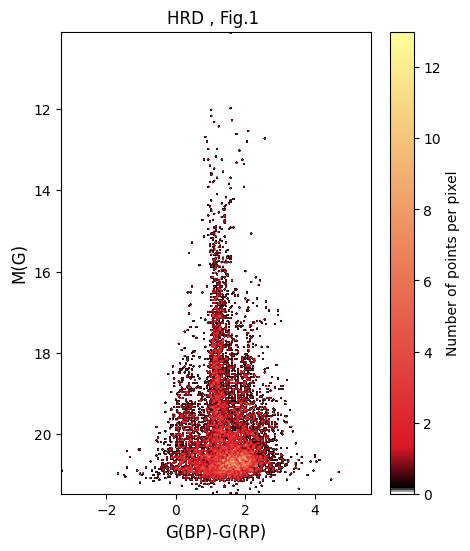

In [10]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Hot" colormap with white background
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (0.01, '#000000'),
    (0.1, '#db1626'),
    (1, '#FFFF99'),
], N=256,)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    fig.set_size_inches(5,6)
    density = ax.scatter_density(x, y, cmap = hot)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
X = Gaia_data_all['bp_rp']
Y = Gaia_data_all['mg']
using_mpl_scatter_density(fig, X , Y )
plt.title("HRD , Fig.1 " ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.savefig('HRD_Fig_1' , dpi=300)
plt.show()

INNER JOIN : LPV and ALL STARS

In [11]:
job = Gaia.launch_job_async("SELECT ra ,dec ,pm , pmra, pmra_error, pmdec,\
pmdec_error, parallax, parallax_error, parallax_over_error, ruwe \
FROM gaiadr3.gaia_source GDR INNER JOIN gaiadr3.vari_long_period_variable GLPV ON GDR.source_id = GLPV.source_id \
WHERE RA > 296.1875 \
AND RA < 296.4375 \
AND DEC > -14.9611 \
AND DEC < -14.6333", dump_to_file=True)
print(job)

Jobid: 1693148104310O
Phase: COMPLETED
Owner: None
Output file: 1693148104310O-result.vot.gz
Results: None


In [12]:
Gaia_data = job.get_results()
Gaia_data = pd.DataFrame(np.array(Gaia_data))
Gaia_data

,ra,dec,pm,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,parallax_over_error,ruwe
0,296.190620,-14.872717,0.170090,-0.040656,0.070719,-0.165160,0.058196,-0.013389,0.063340,-0.211386,1.080137
1,296.199160,-14.848072,0.075734,-0.057716,0.091311,-0.049036,0.071125,-0.070052,0.085187,-0.822333,0.949651
2,296.204197,-14.742654,0.436700,0.293702,0.316629,-0.323181,0.228666,-0.104140,0.233708,-0.445599,1.106096
3,296.208109,-14.726077,0.098997,-0.059223,0.088559,-0.079329,0.070911,-0.147812,0.082526,-1.791083,1.002683
4,296.212874,-14.732164,0.116194,0.075955,0.076767,0.087931,0.059063,-0.040593,0.071694,-0.566195,0.980358
5,296.227242,-14.857690,0.193856,-0.036499,0.048780,-0.190389,0.039787,0.006499,0.044040,0.147573,0.967094
6,296.232096,-14.865551,0.052612,-0.049412,0.048508,-0.018069,0.039162,-0.077250,0.044153,-1.749607,0.973341
7,296.232383,-14.758401,0.142640,0.074379,0.155047,-0.121713,0.138351,-0.317075,0.132658,-2.390169,0.961239
8,296.238801,-14.822388,0.064041,-0.055013,0.056644,-0.032784,0.043802,-0.131519,0.052319,-2.513780,1.050831
9,296.242319,-14.749008,0.222228,-0.126362,0.098842,-0.182805,0.079566,-0.035415,0.090736,-0.390308,1.027135


# NGC6822 Data

In [13]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1382, done.
remote: Counting objects: 100% (316/316), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 1382 (delta 178), reused 174 (delta 113), pack-reused 1066
Receiving objects: 100% (1382/1382), 106.96 MiB | 13.63 MiB/s, done.
Resolving deltas: 100% (679/679), done.
Updating files: 100% (146/146), done.


In [14]:
NGC6822_data = pd.read_csv("/content/NGC_6822/Data_V3/Final_labeled_data_v3.csv")
NGC6822_data

,index,RAJ2000,DEJ2000,Jmag,Hmag,Kmag,SpType,Ref,Rmag
0,1,296.183980,-14.780180,18.230,17.510,17.120,O,Whitelock,NaN
1,2,296.252290,-14.784750,17.490,16.540,16.080,O,Whitelock,NaN
2,3,296.204150,-14.634860,16.580,15.910,15.460,O,Whitelock,NaN
3,4,296.223640,-14.774730,16.440,15.580,15.130,O,Whitelock,NaN
4,5,296.218160,-14.880350,16.300,15.530,15.090,O,Whitelock,NaN
...,...,...,...,...,...,...,...,...,...
327,328,296.044067,-14.905341,18.504,17.750,17.381,C5.5,Kacharov,20.697
328,329,296.003693,-14.974893,18.392,17.560,17.210,C5.5,Kacharov,20.379
329,330,295.993561,-14.990264,17.874,16.702,15.840,C6.5,Kacharov,19.735
330,331,296.020050,-15.036669,17.751,17.008,16.689,C8.2,Kacharov,19.639


#X_Match

##Final data with GAIA DR3

In [15]:
Main_cat = NGC6822_data
Scnd_cat = Gaia_data

In [16]:
Main_cat

,index,RAJ2000,DEJ2000,Jmag,Hmag,Kmag,SpType,Ref,Rmag
0,1,296.183980,-14.780180,18.230,17.510,17.120,O,Whitelock,NaN
1,2,296.252290,-14.784750,17.490,16.540,16.080,O,Whitelock,NaN
2,3,296.204150,-14.634860,16.580,15.910,15.460,O,Whitelock,NaN
3,4,296.223640,-14.774730,16.440,15.580,15.130,O,Whitelock,NaN
4,5,296.218160,-14.880350,16.300,15.530,15.090,O,Whitelock,NaN
...,...,...,...,...,...,...,...,...,...
327,328,296.044067,-14.905341,18.504,17.750,17.381,C5.5,Kacharov,20.697
328,329,296.003693,-14.974893,18.392,17.560,17.210,C5.5,Kacharov,20.379
329,330,295.993561,-14.990264,17.874,16.702,15.840,C6.5,Kacharov,19.735
330,331,296.020050,-15.036669,17.751,17.008,16.689,C8.2,Kacharov,19.639


In [17]:
Scnd_cat

,ra,dec,pm,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,parallax_over_error,ruwe
0,296.190620,-14.872717,0.170090,-0.040656,0.070719,-0.165160,0.058196,-0.013389,0.063340,-0.211386,1.080137
1,296.199160,-14.848072,0.075734,-0.057716,0.091311,-0.049036,0.071125,-0.070052,0.085187,-0.822333,0.949651
2,296.204197,-14.742654,0.436700,0.293702,0.316629,-0.323181,0.228666,-0.104140,0.233708,-0.445599,1.106096
3,296.208109,-14.726077,0.098997,-0.059223,0.088559,-0.079329,0.070911,-0.147812,0.082526,-1.791083,1.002683
4,296.212874,-14.732164,0.116194,0.075955,0.076767,0.087931,0.059063,-0.040593,0.071694,-0.566195,0.980358
5,296.227242,-14.857690,0.193856,-0.036499,0.048780,-0.190389,0.039787,0.006499,0.044040,0.147573,0.967094
6,296.232096,-14.865551,0.052612,-0.049412,0.048508,-0.018069,0.039162,-0.077250,0.044153,-1.749607,0.973341
7,296.232383,-14.758401,0.142640,0.074379,0.155047,-0.121713,0.138351,-0.317075,0.132658,-2.390169,0.961239
8,296.238801,-14.822388,0.064041,-0.055013,0.056644,-0.032784,0.043802,-0.131519,0.052319,-2.513780,1.050831
9,296.242319,-14.749008,0.222228,-0.126362,0.098842,-0.182805,0.079566,-0.035415,0.090736,-0.390308,1.027135


In [18]:
Main_cat_Coord = SkyCoord(Main_cat['RAJ2000'], Main_cat['DEJ2000'], unit=(u.deg, u.deg))
Scnd_cat_Coord = SkyCoord(Scnd_cat['ra'], Scnd_cat['dec'], unit=(u.deg, u.deg))

In [19]:
idx, d2D, d3D = Scnd_cat_Coord.match_to_catalog_sky(Main_cat_Coord)

In [20]:
max_sep = 1.0 * u.arcsec        # Maximum erorr
i_OK = d2D < max_sep

In [21]:
Secondary_catalog = Scnd_cat[i_OK]
Main_catalog = Main_cat.iloc[idx[i_OK]]

Making CSV file

In [22]:
Main_catalog = Main_catalog.reset_index()
Secondary_catalog = Secondary_catalog.reset_index()

X_data = pd.concat([Main_catalog, Secondary_catalog], axis=1)

In [23]:
X_data

,level_0,index,RAJ2000,DEJ2000,Jmag,Hmag,Kmag,SpType,Ref,Rmag,...,dec,pm,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,parallax_over_error,ruwe
0,6,7,296.20428,-14.74271,15.25,14.32,13.92,O,Whitelock,NaN,...,-14.742654,0.436700,0.293702,0.316629,-0.323181,0.228666,-0.104140,0.233708,-0.445599,1.106096
1,97,98,296.20816,-14.72616,14.09,13.21,12.83,RSG,Whitelock,NaN,...,-14.726077,0.098997,-0.059223,0.088559,-0.079329,0.070911,-0.147812,0.082526,-1.791083,1.002683
2,10,11,296.21293,-14.73224,13.72,12.97,12.57,O,Whitelock,NaN,...,-14.732164,0.116194,0.075955,0.076767,0.087931,0.059063,-0.040593,0.071694,-0.566195,0.980358
3,98,99,296.24301,-14.74652,14.10,13.30,12.99,RSG,Whitelock,NaN,...,-14.746473,0.063805,0.018148,0.073044,-0.061169,0.059029,0.026810,0.066105,0.405565,0.961476


sigma = [(pmRA * e_pmRA) + (pmDEC * e_pmDEC)] / [radical {(e_pmRA)^2 + (e_pmDEC)^2}]

In [24]:
X_data['sigma'] = ((X_data['pmra']*X_data['pmra_error']) + (X_data['pmdec']*X_data['pmdec_error'])) / ((X_data['pmra_error']**2 + X_data['pmdec_error']**2)**0.5)

In [25]:
# First limitation Proper motion
X_data = X_data[(X_data['pmra']**2 + X_data['pmdec']**2)**0.5 >= 0.28 + 2 * X_data['sigma']]

In [26]:
# Second limitation Parallax
X_data = X_data[abs(X_data['parallax']/X_data['parallax_error']) > 2 * X_data['sigma'] ]

In [27]:
# Third limitation  RUWE
X_data = X_data[X_data['ruwe']<1.4]

In [28]:
X_data

,level_0,index,RAJ2000,DEJ2000,Jmag,Hmag,Kmag,SpType,Ref,Rmag,...,pm,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,parallax_over_error,ruwe,sigma
0,6,7,296.20428,-14.74271,15.25,14.32,13.92,O,Whitelock,NaN,...,0.436700,0.293702,0.316629,-0.323181,0.228666,-0.104140,0.233708,-0.445599,1.106096,0.048888
1,97,98,296.20816,-14.72616,14.09,13.21,12.83,RSG,Whitelock,NaN,...,0.098997,-0.059223,0.088559,-0.079329,0.070911,-0.147812,0.082526,-1.791083,1.002683,-0.095813
